In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [3]:
#Let us import the given data set of uber 
Uber = pd.read_csv("C:/Users/Iris Xe/Downloads/Uber project/Uber Request Data.csv")
Uber

Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
...          ...          ...        ...                ...   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

        Request timestamp       Drop timestamp  
0         11/7/2016 11:51      11/7/2016 13:00  
1         11/7/2016 17:57      11/7/2016 18:47  
2          12/7/2016 9:17       12/7/2016 9:58  
3         12/7/2016 21:08      12/7/2016 22:03  
4     13-07-2016 08:33:16  13-07-2016 09:25:47  
...                   ...                  ...  
6740  15-07-2016 23:49:03                  NaN  
6741  15-07-2016 23:50:05                  NaN  
6742  15-07-2016 23:52:06                  NaN  
6743  15-07-2016 23:54:39                  NaN  
6744  15-07-2016 23:55:03                  NaN  

[6745 rows x 6 columns]

In [4]:
Uber['Request timestamp']=Uber['Request timestamp'].astype(str)
Uber['Request timestamp']=Uber['Request timestamp'].str.replace('/','-')
Uber['Request timestamp']=pd.to_datetime(Uber['Request timestamp'],dayfirst=True)
Uber['Drop timestamp']=pd.to_datetime(Uber['Drop timestamp'],dayfirst=True)
Uber

Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
...          ...          ...        ...                ...   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

       Request timestamp      Drop timestamp  
0    2016-07-11 11:51:00 2016-07-11 13:00:00  
1    2016-07-11 17:57:00 2016-07-11 18:47:00  
2    2016-07-12 09:17:00 2016-07-12 09:58:00  
3    2016-07-12 21:08:00 2016-07-12 22:03:00  
4    2016-07-13 08:33:16 2016-07-13 09:25:47  
...                  ...                 ...  
6740 2016-07-15 23:49:03                 NaT  
6741 2016-07-15 23:50:05                 NaT  
6742 2016-07-15 23:52:06                 NaT  
6743 2016-07-15 23:54:39                 NaT  
6744 2016-07-15 23:55:03                 NaT  

[6745 rows x 6 columns]

In [5]:
#Let us inspect the dataset
Uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [6]:
# checking the shape i.e row and column
Uber.shape

(6745, 6)

In [7]:
# some import things like mean max check by describe
Uber.describe()

Request id    Driver id
count  6745.000000  4095.000000
mean   3384.644922   149.501343
std    1955.099667    86.051994
min       1.000000     1.000000
25%    1691.000000    75.000000
50%    3387.000000   149.000000
75%    5080.000000   224.000000
max    6766.000000   300.000000

In [9]:

Uber.isnull().sum
#checking for null values column wise
Uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [10]:
# for checking duplicated rows based on request id
dup_chk = Uber["Request id"].duplicated()
dup_chk.sum()

0

In [11]:

#Let us check the null values of Drivers id
Uber[np.isnan(Uber['Driver id'])]

Request id Pickup point  Driver id             Status  \
4095        1362         City        NaN  No Cars Available   
4096        1364         City        NaN  No Cars Available   
4097        1366         City        NaN  No Cars Available   
4098           2      Airport        NaN  No Cars Available   
4099           7      Airport        NaN  No Cars Available   
...          ...          ...        ...                ...   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

       Request timestamp Drop timestamp  
4095 2016-07-11 00:02:00            NaT  
4096 2016-07-11 00:06:00            NaT  
4097 2016-07-11 00:09:00            NaT  
4098 2016-07-11 00:23:00            NaT  
4099 2016-07-11 00:30:00            NaT  
...                  ...            ...  
6740 2016-07-15 23:49:03            NaT  
6741 2016-07-15 23:50:05            NaT  
6742 2016-07-15 23:52:06            NaT  
6743 2016-07-15 23:54:39            NaT  
6744 2016-07-15 23:55:03            NaT  

[2650 rows x 6 columns]

In [12]:
#Droping Drop timestamp column as we will not be using it for analysis.
Uber = Uber.drop(['Drop timestamp'], axis=1) 

In [13]:
#Checking null value percetage in each column

round(100*(Uber.isnull().sum()/len(Uber.index)), 2)

Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
dtype: float64

In [14]:
# Create a new column called request hour from the request timestamp column
#to identify the hours where supply demand gap exists
Uber['Request hour'] = Uber['Request timestamp'].apply(lambda x: x.strftime('%H'))
Uber['Request hour'] =  Uber['Request hour'].astype(int)
Uber.head()

Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2        1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

   Request hour  
0            11  
1            17  
2             9  
3            21  
4             8

In [15]:
# Creating a new column from the hours column by categorizing it into
# 4:00 Am to 7:59Am is Early morning
# 8:00 AM to 11:59 is Morning
# 12:00 to 15:59 is Afternoon
# 16:00 to 19:59 is Evening
# 20:00 to 23:59 is Night
# 24:00 to 3:59 AM is late Night

def timeslot(x):
    if x >= 4 and x < 8:
        return 'Early Morning'
    elif x >= 8 and x < 12:
        return 'Morning'
    elif x >= 12 and x < 16:
        return 'Afternoon'
    elif x >= 16 and x < 20:
        return 'Evening'
    elif x >= 20:
        return 'Night'
    elif x >= 0 and x < 4:
        return 'Late Night'
    
Uber['Request timeslot'] = Uber['Request hour'].apply(timeslot)
Uber.head()

Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2        1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

   Request hour Request timeslot  
0            11          Morning  
1            17          Evening  
2             9          Morning  
3            21            Night  
4             8          Morning

Text(-2.6999999999999957, 0.5, 'Request Frequency')

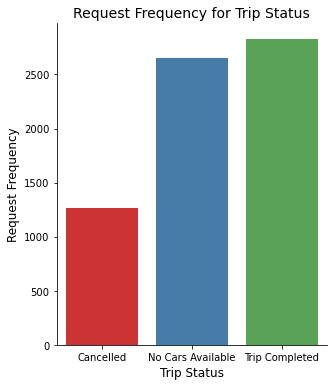

In [16]:
order_status = Uber['Status'].sort_values(ascending = True).unique().tolist()
plot = sns.catplot(x="Status", kind="count", data=Uber, palette="Set1", aspect= .9, order=order_status);

plt.title('Request Frequency for Trip Status', fontsize = 14)
plt.xlabel("Trip Status", fontsize = 12)
plt.ylabel("Request Frequency", fontsize = 12)

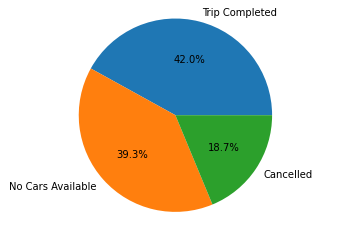

In [17]:

#Status distribution in pie Chart
Uber.loc[(Uber.Status =="Trip Completed"),'TripComp'] =1
Uber.loc[(Uber.Status =="No Cars Available"),'NoCars'] =1
Uber.loc[(Uber.Status =="Cancelled"),'Cancel'] =1


labels = ['Trip Completed', 'No Cars Available', 'Cancelled']
sizes = [Uber['TripComp'].value_counts()[1],
         Uber['NoCars'].value_counts()[1],
         Uber['Cancel'].value_counts()[1],
         ]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.show()

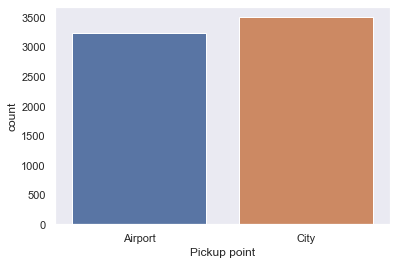

In [18]:
#Ploting a countplot of pickup point 
sns.set(style="dark")
ax = sns.countplot(x="Pickup point", data=Uber)
plt.show()

In [19]:
# Analyze Status and Pickup point.
Uber.groupby(['Status','Pickup point']).size()

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

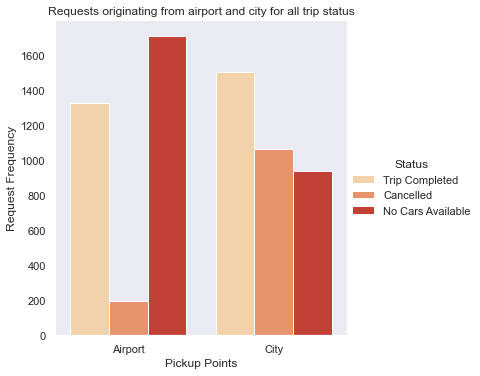

In [33]:
#Identify the number of requests for trips originating from airport and city for all the 3 trip status.
plot = sns.catplot(x="Pickup point", hue="Status", palette='OrRd', kind="count", data=Uber);

plt.title('Requests originating from airport and city for all trip status', fontsize = 12)
plt.xlabel("Pickup Points", fontsize = 12)
plt.ylabel("Request Frequency", fontsize = 12)
plt.show()

<AxesSubplot:xlabel='Status', ylabel='count'>

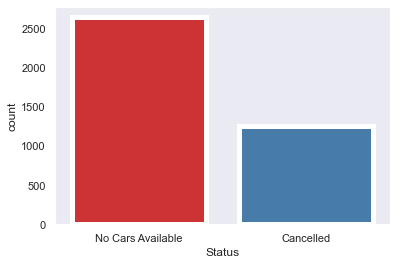

In [41]:
#Plot Showing frequency of requests that get cancelled or show 'No cars Available'

sns.countplot(x="Status", palette="Set1", linewidth=5, data=Uber[Uber.Status != 'Trip Completed'], 
              order = ['No Cars Available','Cancelled'])

ValueError: Could not interpret input 'Request dayofweek'

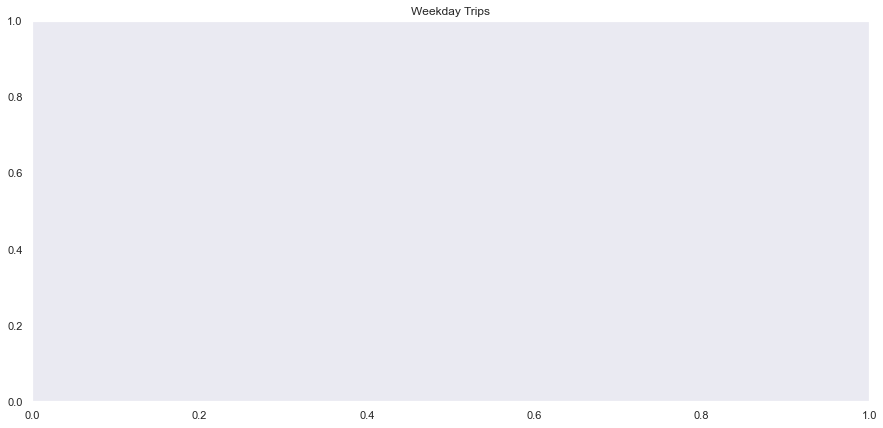

In [47]:
# Status for each day
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Weekday Trips")
ax = sns.countplot(x='Request dayofweek',hue='Status',data=Uber,palette='rainbow')
plt.legend(bbox_to_anchor=(1.17, 0.5), loc='right')


In [30]:
#looking to find the request count vs daysof week 
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='Request dayofweek', data=Uber)
plt.show()

ValueError: Could not interpret input 'Request dayofweek'

<Figure size 864x576 with 0 Axes>

In [39]:
# Let us see the status vs days of week again each pick up point.
order_days = ['Monday','Tuesday','Wednesday','Thursday','Friday']

filter_trip_status_df = Uber[(Uber['Status'] == 'Cancelled') | (Uber['Status'] == 'No Cars Available')]

plot = sns.catplot(x="Request dayofweek", col= 'Pickup point', hue="Status", palette='Set1', kind="count", 
                   data=filter_trip_status_df, aspect=1.5, order=order_days);

plot.fig.suptitle('Trip Analysis based on Day Of Week', fontsize=14)
plot.set_xlabels('Day Of Week', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)
plt.show()

ValueError: Could not interpret input 'Request dayofweek'

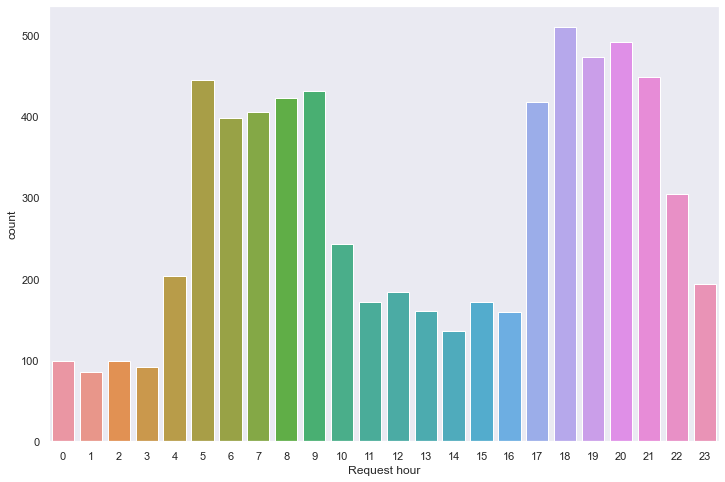

In [48]:
#looking for insight in request hour
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(x='Request hour', data=Uber)
plt.show()

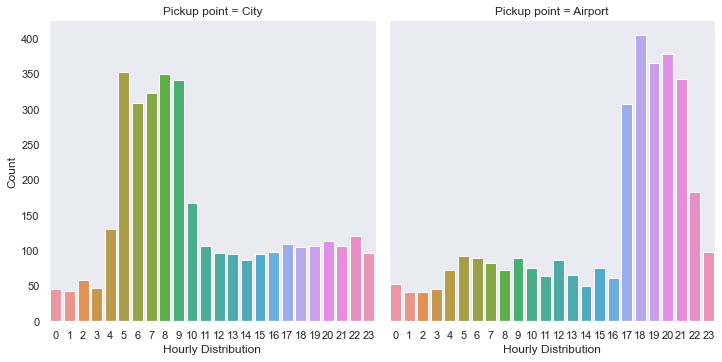

In [49]:
# Hourly distribution by Pickup point

g=sns.catplot(x="Request hour",col="Pickup point",kind="count",col_order = ['City','Airport'],data=Uber)
g.set_axis_labels("Hourly Distribution" ,"Count")

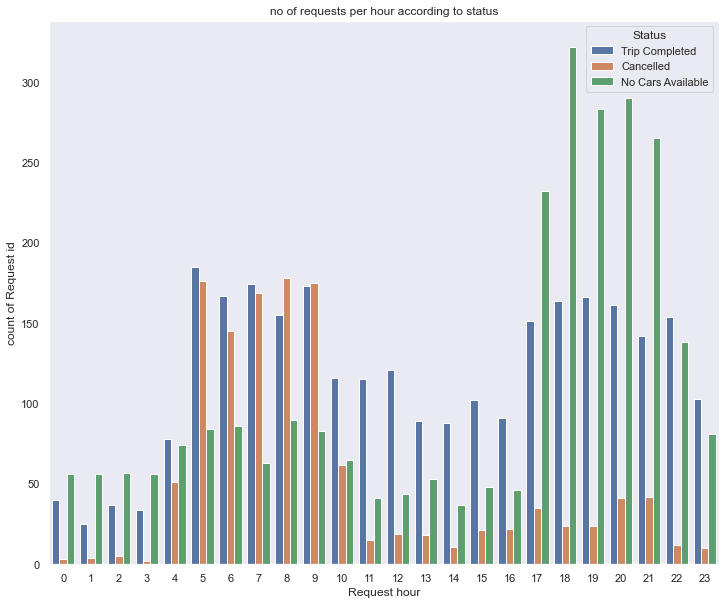

In [50]:
#now plotting for requests per hour according to status 
plt.figure(figsize=(12,10))
sns.barplot(x='Request hour',y='Request id',hue='Status',data=Uber,estimator=len)
plt.title("no of requests per hour according to status")
plt.ylabel("count of Request id")
plt.show()

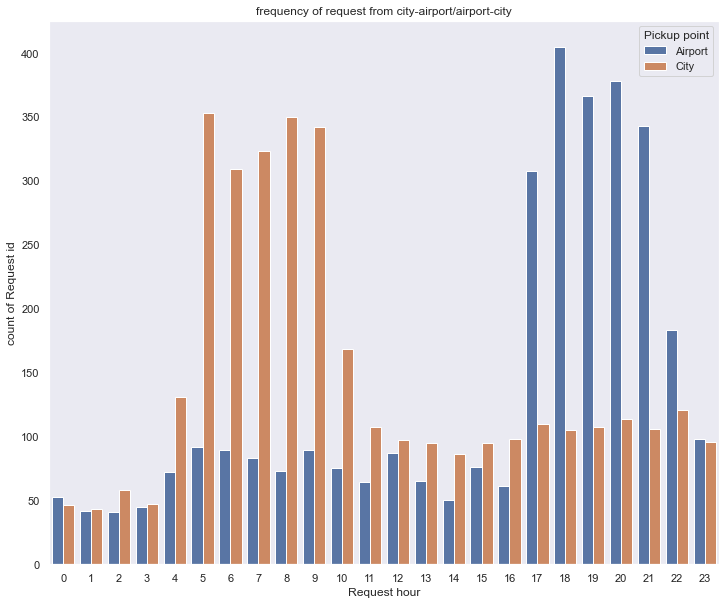

In [51]:
#plot of no. of requests from city to airport/airport to city
plt.figure(figsize=(12,10))
sns.barplot(x='Request hour', y='Request id', hue='Pickup point',data=Uber, estimator=len)
plt.title("frequency of request from city-airport/airport-city")
plt.ylabel("count of Request id")
plt.show()

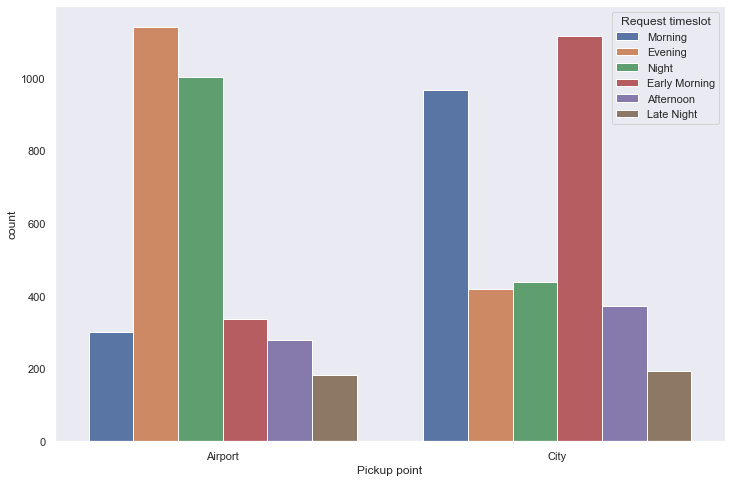

In [52]:
#segmenting pickup point over time slot
plt.figure(num=None, figsize=(12, 8))
sns.countplot(x='Pickup point', hue="Request timeslot", data=Uber)
plt.show()



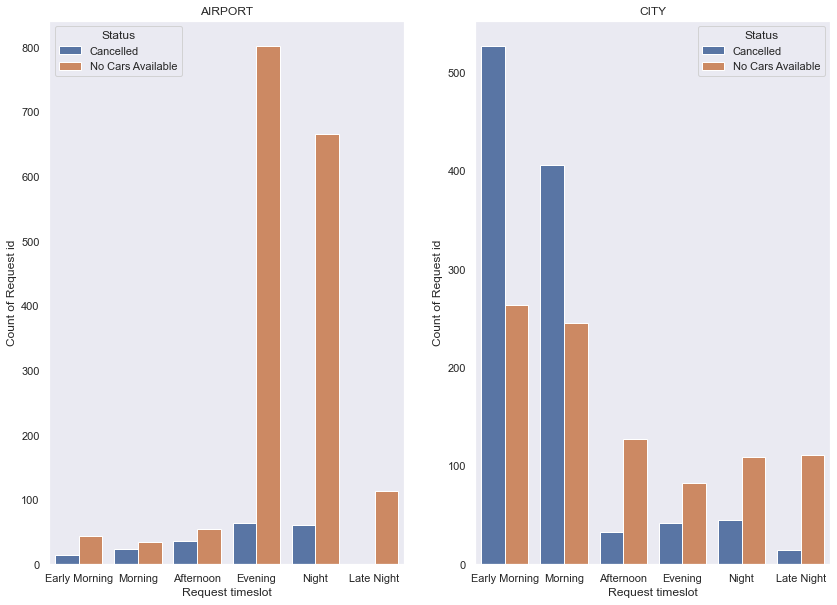

In [53]:
#plots of frquency of request

order_timeslot = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']
plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
sns.barplot(x='Request timeslot',y='Request id',hue='Status',data=Uber[(Uber['Pickup point']=='Airport')&
(Uber['Status']!='Trip Completed')],estimator=len,order = order_timeslot)
plt.title("AIRPORT")
plt.ylabel("Count of Request id")


plt.subplot(1,2,2)
sns.barplot(x='Request timeslot',y='Request id',hue='Status',data=Uber[(Uber['Pickup point']=='City')&
(Uber['Status']!='Trip Completed')],estimator=len, order = order_timeslot)
plt.title("CITY")
plt.ylabel("Count of Request id")
plt.show()

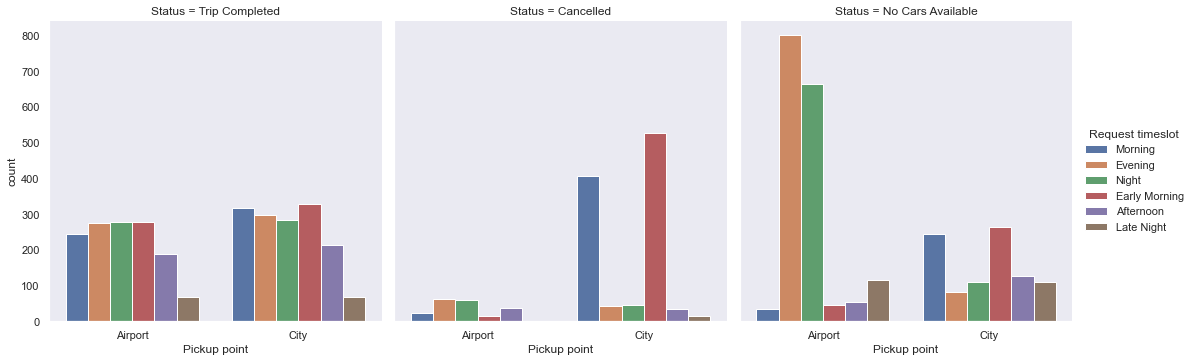

In [54]:
#segmenting the timeslot vs both Status and pickup point 

sns.catplot(x='Pickup point',col="Status", hue = 'Request timeslot',data=Uber ,kind="count")
plt.show()



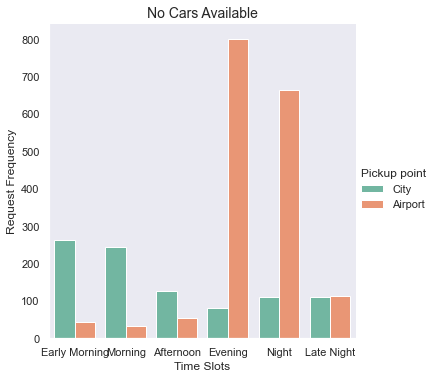

In [55]:
no_cars_available = Uber[(Uber['Status'] == 'No Cars Available')]

plot = sns.catplot(x="Request timeslot", hue="Pickup point", kind="count", palette="Set2", 
            data=no_cars_available, order = order_timeslot)

plt.title('No Cars Available', fontsize = 14)
plt.ylabel('Request Frequency', fontsize = 12)
plt.xlabel('Time Slots', fontsize = 12)

plt.show()

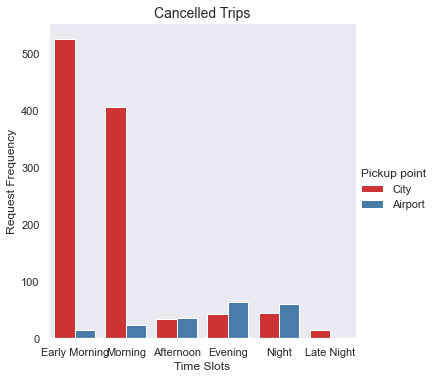

In [56]:
# The order of display of time slot
order_timeslot = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']

cancelled = Uber[(Uber['Status'] == 'Cancelled')]

plot = sns.catplot(x="Request timeslot", hue="Pickup point", kind="count", palette="Set1", 
            data=cancelled, order = order_timeslot);
plt.title('Cancelled Trips', fontsize = 14)
plt.ylabel("Request Frequency", fontsize = 12)
plt.xlabel("Time Slots", fontsize = 12)

plt.show()

C:\Users\Iris Xe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


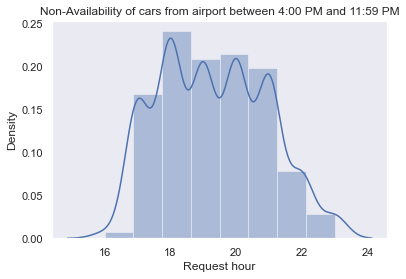

In [57]:
evening_unavailable_cars = no_cars_available[(((no_cars_available['Request timeslot'] == 'Evening') 
                                                     | (no_cars_available['Request timeslot'] == 'Night')) 
                                                    & (no_cars_available['Pickup point'] == 'Airport'))]
plt.title('Non-Availability of cars from airport between 4:00 PM and 11:59 PM') 
sns.distplot(evening_unavailable_cars['Request hour'], bins=8) 
plt.show()

In [58]:
#creating demand column
Uber.loc[(Uber.Status == 'Trip Completed') | (Uber.Status == 'Cancelled')| (Uber.Status == 'No Cars Available'), 'demand'] = 'Demand' 

In [59]:
#creating supply column
Uber.loc[(Uber.Status == 'Trip Completed'), 'supply'] = 'Supply'

In [60]:
#creating gap column
Uber.loc[(Uber.Status == 'Cancelled')| (Uber.Status == 'No Cars Available'), 'gap'] = 'Gap' 

In [61]:
Uber.head()

Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2        1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

   Request hour Request timeslot  TripComp  NoCars  Cancel  demand  supply  \
0            11          Morning       1.0     NaN     NaN  Demand  Supply   
1            17          Evening       1.0     NaN     NaN  Demand  Supply   
2             9          Morning       1.0     NaN     NaN  Demand  Supply   
3            21            Night       1.0     NaN     NaN  Demand  Supply   
4             8          Morning       1.0     NaN     NaN  Demand  Supply   

   gap  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN

In [62]:
Uber_SupplyandDemand = pd.DataFrame([Uber.demand,Uber.supply,Uber.gap]).transpose()
Uber_SupplyandDemand.head()

demand  supply  gap
0  Demand  Supply  NaN
1  Demand  Supply  NaN
2  Demand  Supply  NaN
3  Demand  Supply  NaN
4  Demand  Supply  NaN

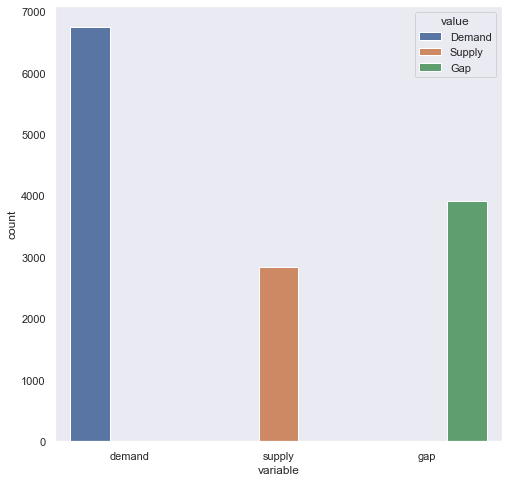

In [63]:
# plotting demand, supply and gap count
plt.figure(num=None, figsize=(8, 8), facecolor='w', edgecolor='k')
sns.countplot(x="variable",hue="value", data=pd.melt(Uber_SupplyandDemand))
plt.show()

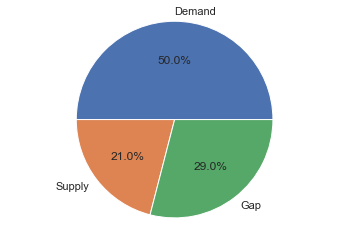

In [64]:
#percentage  distribution in pie Chart
Uber.loc[(Uber.Status == 'Trip Completed') | (Uber.Status == 'Cancelled')| (Uber.Status == 'No Cars Available'), 'demand'] =1
Uber.loc[(Uber.Status == 'Trip Completed'), 'supply']=1
Uber.loc[(Uber.Status == 'Cancelled')| (Uber.Status == 'No Cars Available'), 'gap'] =1


labels = ['Demand', 'Supply', 'Gap']
sizes = [Uber['demand'].value_counts()[1],
         Uber['supply'].value_counts()[1],
         Uber['gap'].value_counts()[1],
         ]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.show()

In [65]:
# Create a new column to determine supply vs supply demand gap
# function returns the value Supply or Supply Demand Gap based on the trip status

def setSupplyorSupplyDemandGap(x):
    if x == 'Trip Completed':
        return 'Supply'
    else:       
        return 'Supply demand gap'
    
Uber['Supply demand gap'] = Uber['Status'].apply(setSupplyorSupplyDemandGap)
Uber.head()

Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2        1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

   Request hour Request timeslot  TripComp  NoCars  Cancel demand supply  gap  \
0            11          Morning       1.0     NaN     NaN      1      1  NaN   
1            17          Evening       1.0     NaN     NaN      1      1  NaN   
2             9          Morning       1.0     NaN     NaN      1      1  NaN   
3            21            Night       1.0     NaN     NaN      1      1  NaN   
4             8          Morning       1.0     NaN     NaN      1      1  NaN   

  Supply demand gap  
0            Supply  
1            Supply  
2            Supply  
3            Supply  
4            Supply

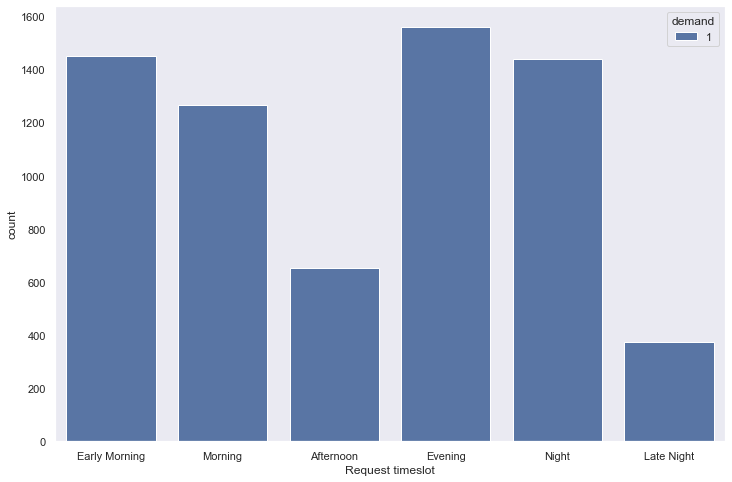

In [66]:
#segmenting demand across the request time slot
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(hue='demand',x="Request timeslot", data=Uber,order=order_timeslot)
plt.show()

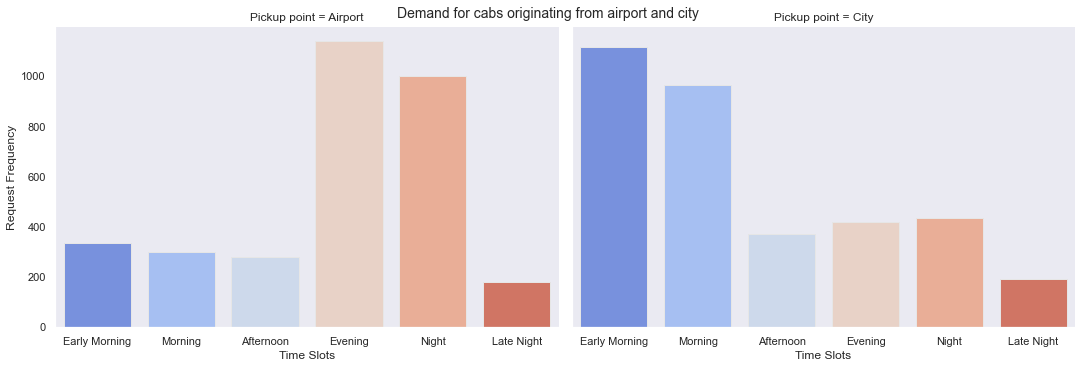

In [67]:
plot = sns.catplot(x='Request timeslot', col="Pickup point", kind="count", palette="coolwarm", edgecolor=".9", aspect = 1.5, 
          data=Uber, order = order_timeslot)

plot.fig.suptitle('Demand for cabs originating from airport and city', fontsize=14)
plot.set_xlabels('Time Slots', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)
plt.show()

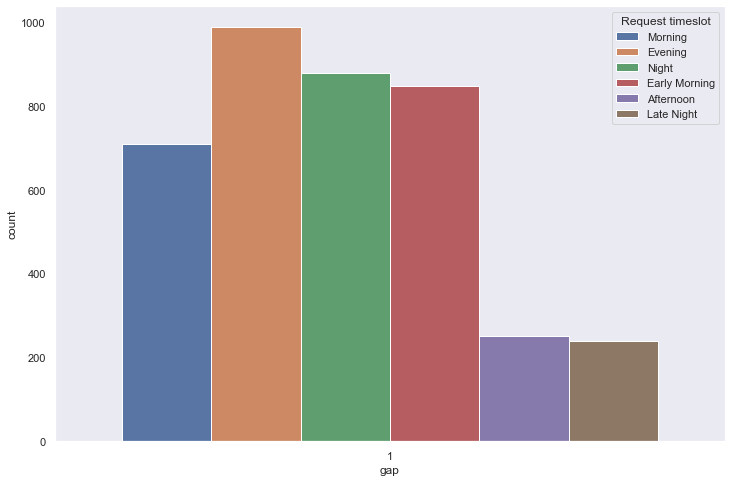

In [68]:
# Checking the gap at each time slot.
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='gap',hue="Request timeslot", data=Uber)
total = len(Uber['gap'])

plt.show()



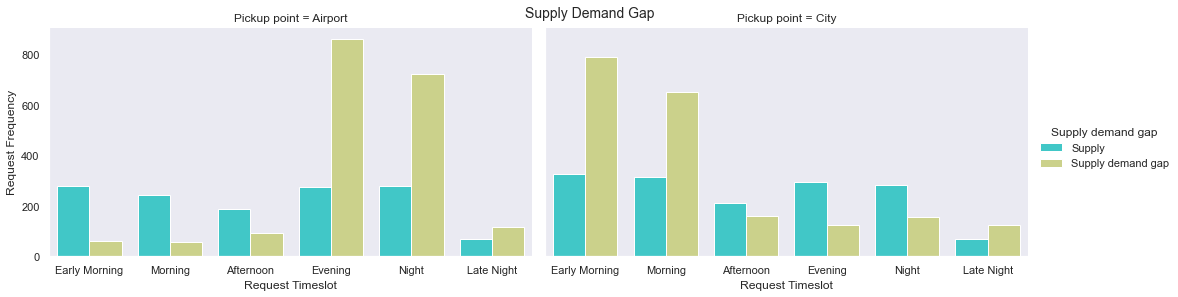

In [69]:
# Let us Check the Supply demand gap or gap at both pickup point.
plot = sns.catplot(x="Request timeslot", hue="Supply demand gap", col = 'Pickup point', data=Uber, palette='rainbow', 
            kind="count", height=4, aspect = 1.8, order = order_timeslot);

plot.fig.suptitle('Supply Demand Gap', fontsize=14)
plot.set_xlabels('Request Timeslot', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)
plt.show()

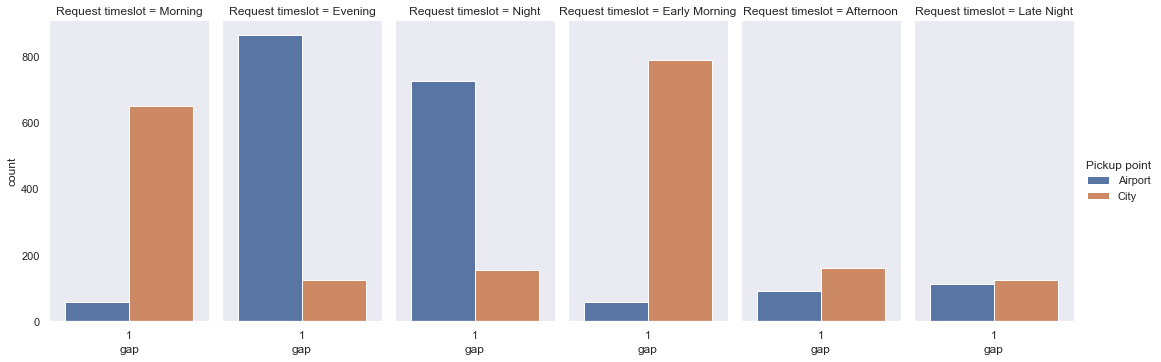

In [70]:
# Checking the gap at every timeslot vs both pickup point.
sns.catplot(x='gap',col="Request timeslot", hue = 'Pickup point',data=Uber ,kind="count", height=5,aspect= 0.5,
            ci=85)
plt.show()


<Figure size 936x360 with 0 Axes>

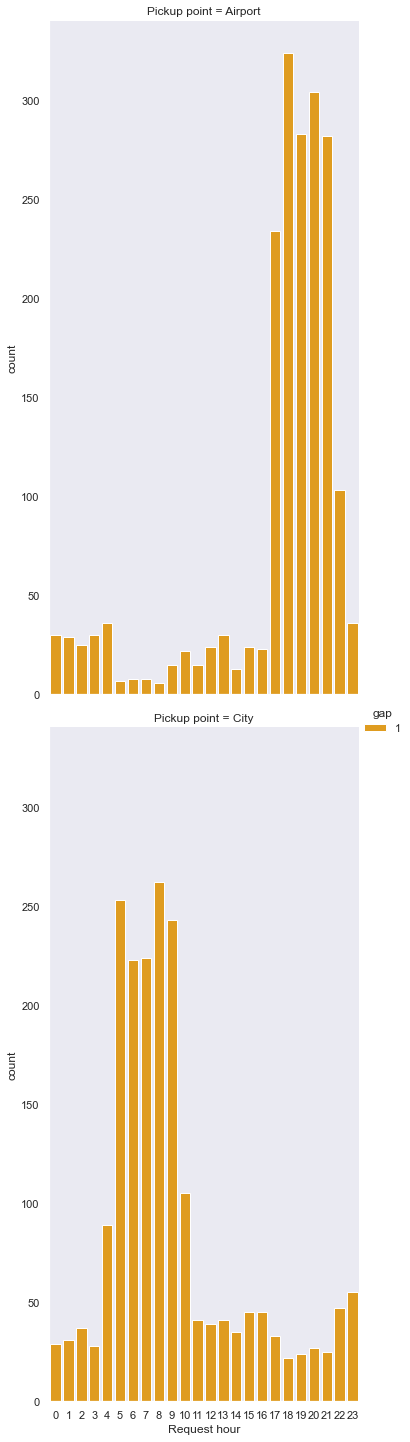

In [71]:
# Checking the gap at every hour vs both the pickup point
plt.figure(num=None, figsize=(13, 5), facecolor='w', edgecolor='k')
sns.catplot(x='Request hour',col="Pickup point", hue = 'gap',data=Uber ,kind="count", height=10,aspect= 0.5,
            ci=85,col_wrap=1,palette=sns.color_palette(['orange']))
plt.show()

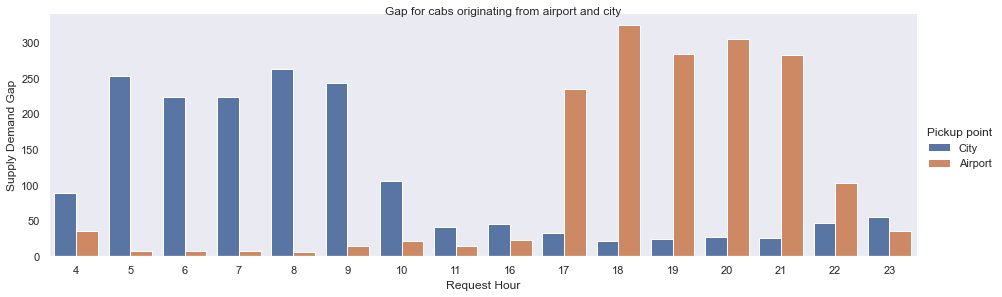

In [72]:
# filter based on the request time slots and supply demand gap

most_severe_gap = Uber[((Uber['Request timeslot'] == 'Evening') |
                           (Uber['Request timeslot'] == 'Night') | 
                           (Uber['Request timeslot'] == 'Early Morning') | 
                           (Uber['Request timeslot'] == 'Morning')) & 
                          (Uber['Supply demand gap'] == 'Supply demand gap')] 

plot = sns.catplot(x="Request hour", hue="Pickup point", data=most_severe_gap, kind="count", 
            height=4, aspect = 3.2)

plot.fig.suptitle('Gap for cabs originating from airport and city', fontsize=12)
plot.set_xlabels('Request Hour', fontsize=12)
plot.set_ylabels('Supply Demand Gap', fontsize=12)
plt.show()